In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib as plt 
import spacy as inl 
from wordcloud import WordCloud
from collections import Counter
from time import time
import nltk
from tqdm import tqdm
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words('english')
import string as st

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#!python -m spacy download en_core_web_md

In [3]:
ennlp = inl.load('en_core_web_md')

In [4]:
stopwords.extend(['layoff','layoffs'])

In [5]:
df = pd.read_csv('data_clean.csv')
df = df.drop(df.columns[0], axis=1) #drop unnamed column in index 0
df.head()

,tweet_id,user_id,description,location,following,followers,totaltweets,retweetcount,hashtags,text
0,1,100,"Perspicacity, Persistence, Prudence, Providenc...","New Delhi, India",541,44,20172,1,[],Entering a startup during a time of layoffs ca...
1,2,101,"Philadelphia area news, traffic, weather, poli...",Philadelphia,564,917037,355876,0,[],There are more people that have been moved int...
2,4,103,non-stop crew prop | @columbuscrew | @columbus...,NaN,974,747,16047,0,[],you guys play like a relegationthreatened cha...
3,5,104,NaN,NaN,533,186,18550,0,[],McKinsey amp Co doing what it does best Layof...
4,6,105,"husband, __ and __ father, brother, friend to ...",new york,367,43,1071,0,[],Bottom line is all the companies are becomi...


Original training data shape:  (999,)
Number of total text: 151526


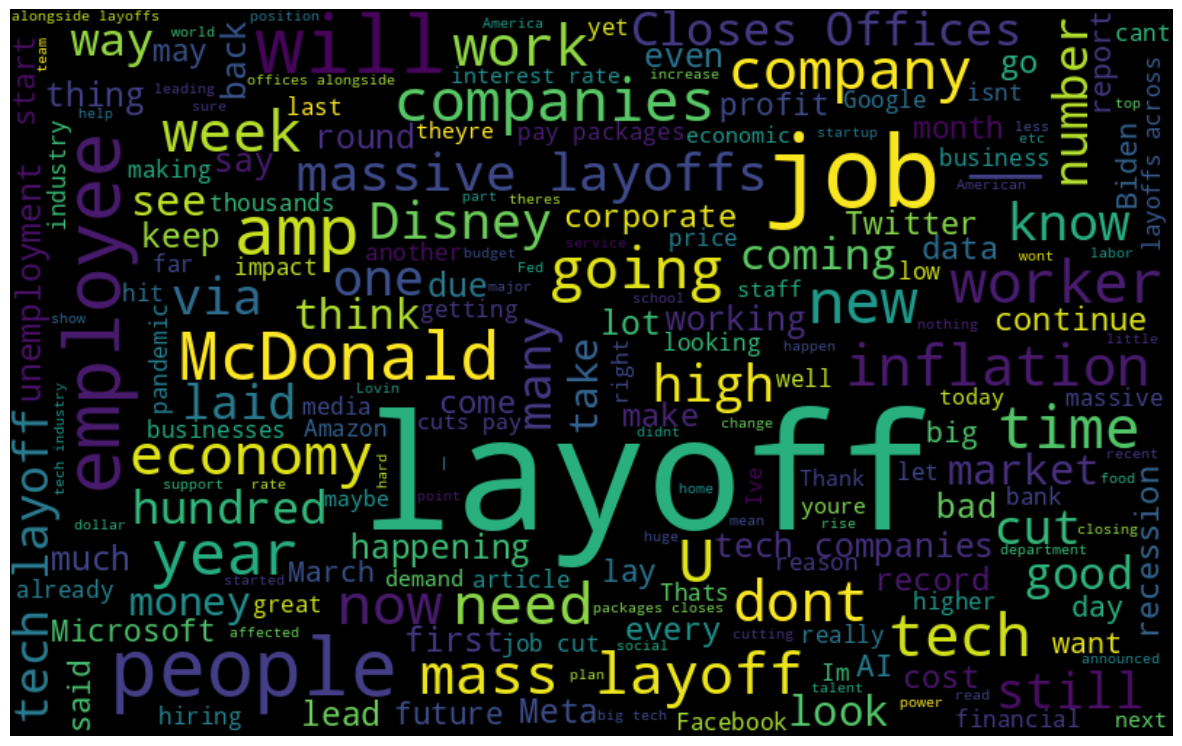

In [6]:
# Combine all training text into one large string
print('Original training data shape: ', df['text'].shape)
all_text = ' '.join([text for text in df['text']])
print('Number of total text:', len(all_text))

# Word cloud for entire training dataset
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_text)
plt.pyplot.figure(figsize=(15, 12))
plt.pyplot.imshow(wordcloud, interpolation="bilinear")
plt.pyplot.axis('off')
plt.pyplot.show()

In [7]:
#remove stopwords

# Clean text before feeding it to spaCy
punctuations = st.punctuation + '¿' + '¡' + '\ufeff1' + '…'

# Define function to cleanup text by removing personal pronouns, stopwords, and puncuation
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = ennlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

Original training data shape:  (999,)
Cleaned up training data shape:  (999,)
Number of total text: 96878


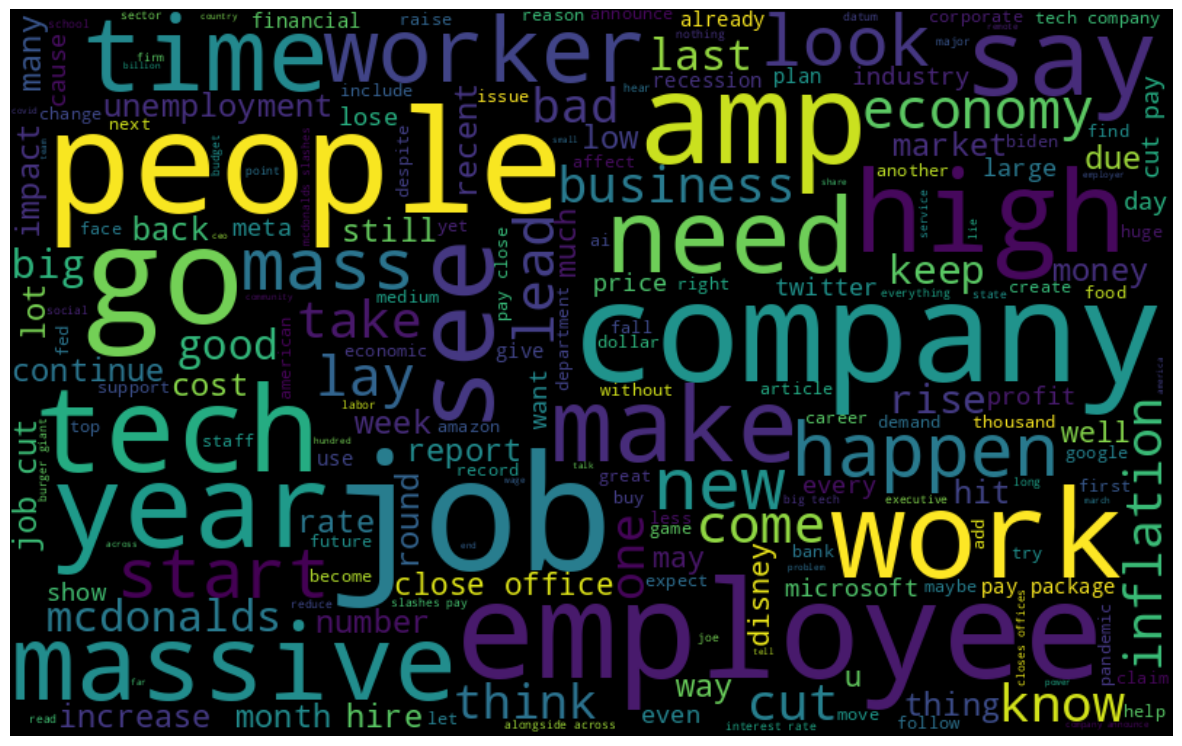

In [8]:
# Cleanup text and make sure it retains original shape
print('Original training data shape: ', df['text'].shape)
text_cleaned = cleanup_text(df['text'], logging=True)
print('Cleaned up training data shape: ', text_cleaned.shape)


# Combine all text into one large string
all_text_cleaned = ''.join([text for text in text_cleaned])
print('Number of total text:', len(all_text_cleaned))

# Word cloud for entire dataset
wordcloud = WordCloud(width=800, height=500,
                      random_state=21, max_font_size=110).generate(all_text_cleaned)
plt.pyplot.figure(figsize=(15, 12))
plt.pyplot.imshow(wordcloud, interpolation="bilinear")
plt.pyplot.axis('off')
plt.pyplot.show()

Graph the 25 most common words with their counts

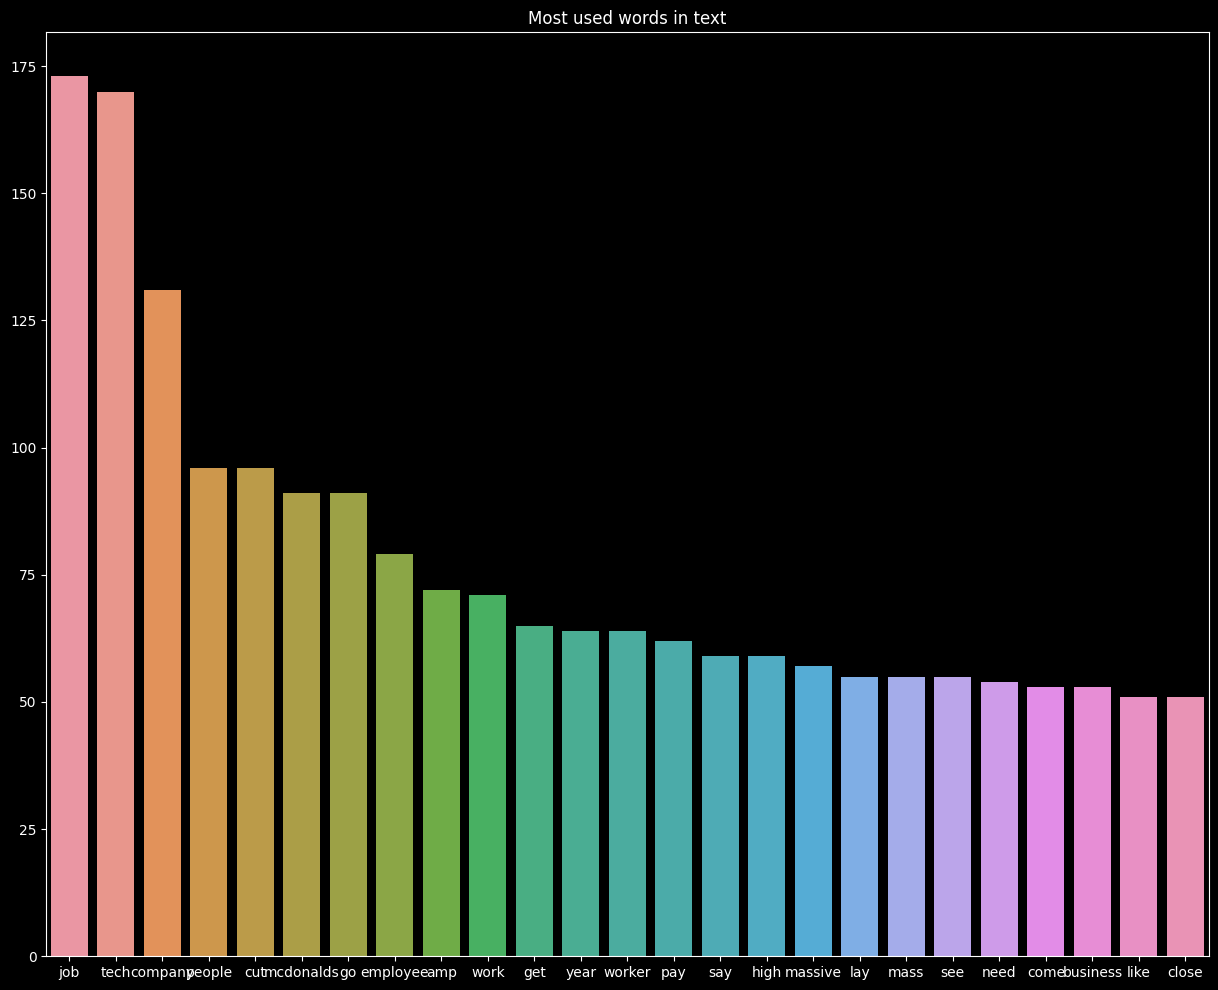

In [9]:
all_text = [text for text in df['text']]
all_text_clean = cleanup_text(all_text)
all_text_clean = ' '.join(all_text_clean).split()
all_text_clean = [word for word in all_text_clean if word != '\'s']
all_text_counts = Counter(all_text_clean)
all_text_common_words = [word[0] for word in all_text_counts.most_common(25)]
all_text_common_counts = [word[1] for word in all_text_counts.most_common(25)]

plt.pyplot.style.use('dark_background')
plt.pyplot.figure(figsize=(15, 12))
sns.barplot(x=all_text_common_words, y=all_text_common_counts)
plt.pyplot.title('Most used words in text')
plt.pyplot.show()